## Instalar librerías

In [10]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
import statsmodels.api as sms

## Simulación del ejemplo 4 de la PD

![Texto alternativo](https://private-user-images.githubusercontent.com/133716845/491800657-79080098-7da9-4e31-985a-4a2c1ea6c9a7.png?jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NTkwOTkyODksIm5iZiI6MTc1OTA5ODk4OSwicGF0aCI6Ii8xMzM3MTY4NDUvNDkxODAwNjU3LTc5MDgwMDk4LTdkYTktNGUzMS05ODVhLTRhMmMxZWE2YzlhNy5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjUwOTI4JTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI1MDkyOFQyMjM2MjlaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT1jMTc4NTZmYWQ3NjA5YTM2OTcwNDI5ZjA4YWJiMWVhZWVhNzQwN2MzYzUwMzg0OGVjZmY5ZTlhMjY4YTQ3OTA0JlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCJ9.J-Znrfn3bqMHFAmwsby2n3PrALcRIhAJiVtaYTlFido )

In [6]:
sample = np.random.uniform(0, 1, (1_000_000, 1)) < 0.001
sample.sum()
sample_indices = np.where(sample)[0]

In [4]:
pop_U1 = np.random.normal(0, 1, (1_000_000, 1))
pop_U2 = np.random.normal(0, 1, (1_000_000, 1))
pop_Z = pop_U1 + pop_U2 + np.random.normal(0, 1, (1_000_000, 1))
pop_X = pop_U1 + np.random.normal(0, 1, (1_000_000, 1))
pop_Y = pop_X + pop_U2 + pop_Z + np.random.normal(0, 1, (1_000_000, 1))

## Regresión controlando y no controlando por Z

In [7]:
print(sms.OLS(pop_Y[sample_indices], pop_X[sample_indices]).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.399
Model:                            OLS   Adj. R-squared (uncentered):              0.398
Method:                 Least Squares   F-statistic:                              667.9
Date:                Sun, 28 Sep 2025   Prob (F-statistic):                   2.21e-113
Time:                        17:41:11   Log-Likelihood:                         -2365.1
No. Observations:                1008   AIC:                                      4732.
Df Residuals:                    1007   BIC:                                      4737.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
print(sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z))[sample_indices]).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              2859.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):                        0.00
Time:                        17:41:36   Log-Likelihood:                         -1664.1
No. Observations:                1008   AIC:                                      3332.
Df Residuals:                    1006   BIC:                                      3342.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
!pip install causalgraphicalmodels

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 47.1 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ---------------------------------------- 0/3 [networkx]
   ------------------------

## Graficar con intervalos de confianza

In [16]:
df = pd.DataFrame({"X": pop_X.flatten(),  "Z": pop_Z.flatten(), "Y": pop_Y.flatten() })
df_sample = df.iloc[sample_indices]
Xmat = sms.add_constant(df_sample[["X", "Z"]])
Y = df_sample["Y"]
model = sms.OLS(Y, Xmat).fit()
b = model.params["X"]
se = model.bse["X"]
tcrit = stats.t.ppf(1 - 0.01/2, df=int(model.df_resid))
lo1, hi1 = b - tcrit*se, b + tcrit*se

In [17]:
Xmat = sms.add_constant(df_sample[["X"]])
Y = df_sample["Y"]
model = sms.OLS(Y, Xmat).fit()
b2 = model.params["X"]
se = model.bse["X"]
tcrit2 = stats.t.ppf(1 - 0.01/2, df=int(model.df_resid))
lo2, hi2 = b2 - tcrit2*se, b2 + tcrit2*se

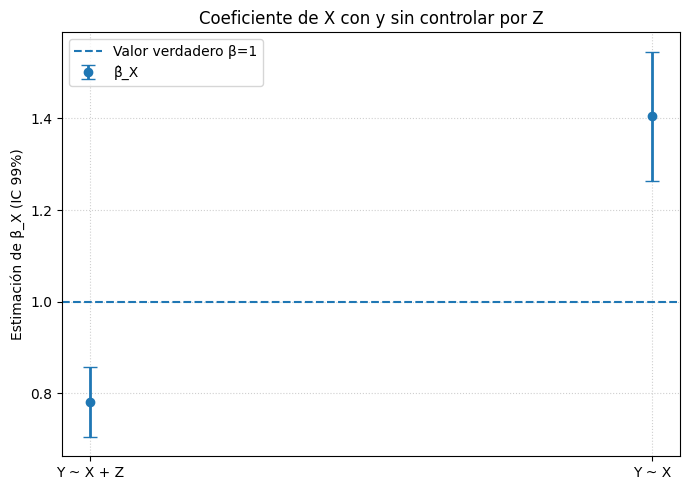

In [19]:
labels = ["Y ~ X + Z", "Y ~ X"]
betas  = np.array([b, b2])
yerr   = np.vstack([betas - np.array([lo1, lo2]),
                    np.array([hi1, hi2]) - betas])

x = np.arange(len(labels))

plt.figure(figsize=(7,5))
plt.errorbar(x, betas, yerr=yerr, fmt="o", capsize=5, linewidth=2, label="β̂_X")
plt.axhline(1.0, linestyle="--", linewidth=1.5, label="Valor verdadero β=1")
plt.xticks(x, labels, rotation=0)
plt.ylabel("Estimación de β_X (IC 99%)")
plt.title("Coeficiente de X con y sin controlar por Z")
plt.grid(True, linestyle=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()